In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("./data_train.csv")

In [ ]:
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001518,Male,Yes,1,Graduate,No,1538,1425.0,30.0,360.0,1.0,Urban,Y
1,1,LP002734,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,Y
2,2,LP002697,Male,No,0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,N
3,3,LP002455,Male,Yes,2,Graduate,No,3859,0.0,96.0,360.0,1.0,Semiurban,Y
4,4,LP001732,Male,Yes,2,Graduate,NaN,5000,0.0,72.0,360.0,0.0,Semiurban,N


In [ ]:
data.shape

(491, 14)

In [ ]:
data.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender               12
Married               3
Dependents           13
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           17
Loan_Amount_Term     12
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data.dropna(inplace=True)

if 'Unnamed: 0' in list(data.keys()):
    data.drop(columns=['Unnamed: 0'],inplace=True)
if 'Loan_ID' in list(data.keys()):
    data.drop(columns=['Loan_ID'],inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape)
data.dtypes

(373, 12)


Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
data.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
368,Male,Yes,2,Graduate,No,11757,0.0,187.0,180.0,1.0,Urban,Y
369,Female,No,0,Graduate,No,5000,0.0,132.0,360.0,1.0,Rural,Y
370,Male,Yes,2,Graduate,No,4616,0.0,134.0,360.0,1.0,Urban,N
371,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,Y
372,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


In [ ]:
features = data.loc[:, data.columns != 'Loan_Status']
label = data.loc[:,data.columns == 'Loan_Status']

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

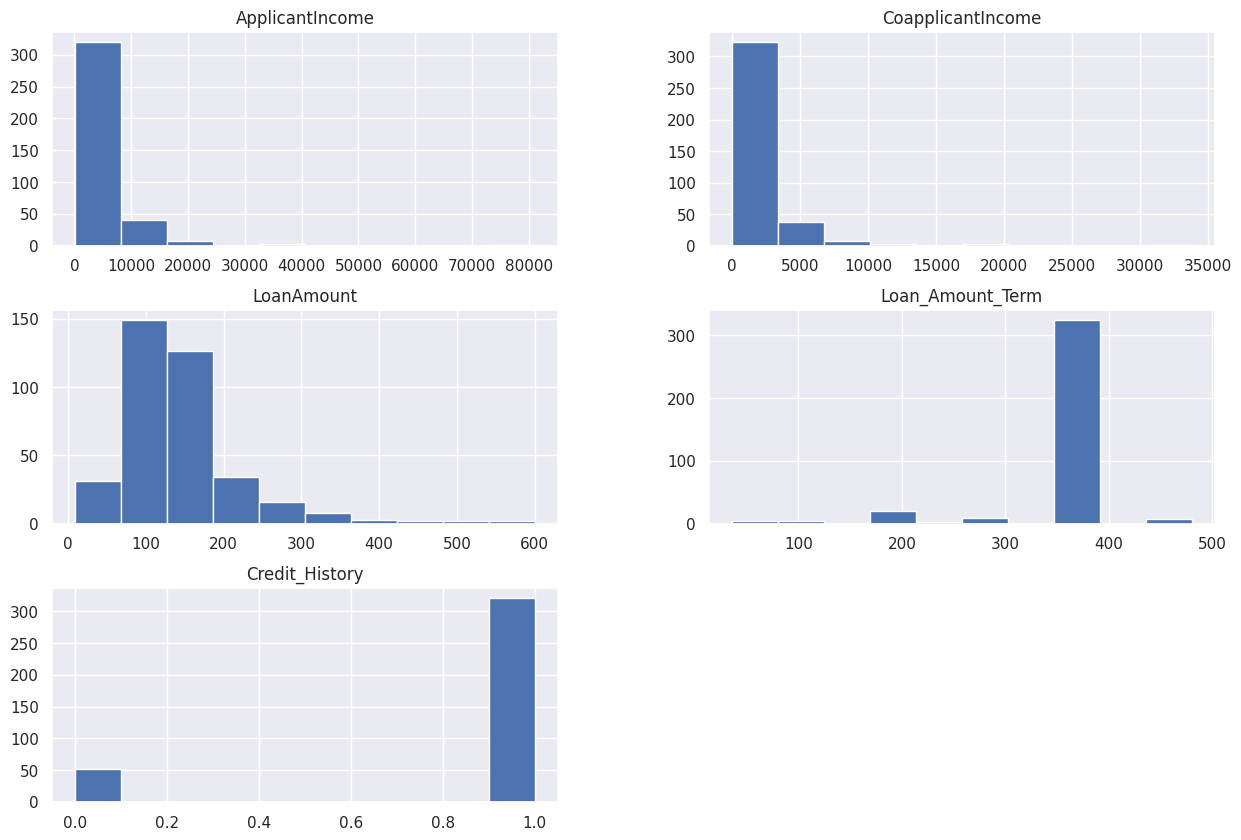

In [ ]:
data.hist(figsize=(15,10))

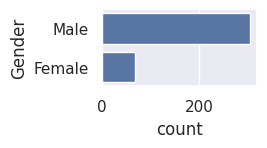

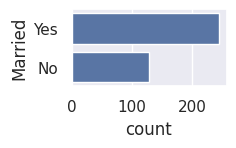

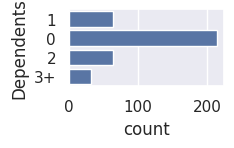

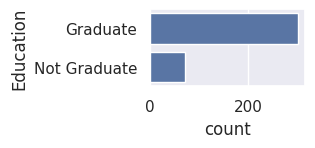

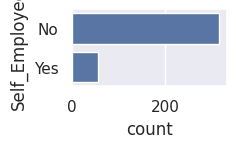

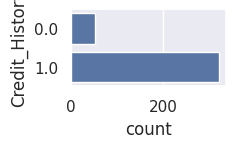

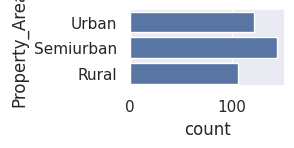

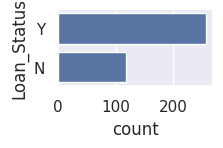

In [ ]:
sns.set(rc={"figure.figsize":(2, 1)})
sns.countplot(y='Gender',data=features)
plt.show()
sns.countplot(y='Married',data=features)
plt.show()
sns.countplot(y='Dependents',data=features)
plt.show()
sns.countplot(y='Education',data=features)
plt.show()
sns.countplot(y='Self_Employed',data=features)
plt.show()
sns.countplot(y='Credit_History',data=features)
plt.show()
sns.countplot(y='Property_Area',data=features)
plt.show()
sns.countplot(y='Loan_Status',data = label)
plt.show()

In [ ]:
col_name = data.dtypes.index
for i in range(len(data.dtypes)):
    col_type = ('categorical','continuous')[data.dtypes[i] in [np.int64,np.float64]]
    print(col_name[i],":",data.dtypes[i],':',col_type)

Gender : object : categorical
Married : object : categorical
Dependents : object : categorical
Education : object : categorical
Self_Employed : object : categorical
ApplicantIncome : int64 : continuous
CoapplicantIncome : float64 : continuous
LoanAmount : float64 : continuous
Loan_Amount_Term : float64 : continuous
Credit_History : float64 : continuous
Property_Area : object : categorical
Loan_Status : object : categorical


\begin{array}{|c|c|}
\hline
Feature & type\\ \hline
'Loan\_ID' & categorical\\  \hline
'Gender'& categorical\\ \hline
'Married'& categorical\\ \hline
'Dependents'& categorical\\ \hline
'Education'& categorical\\ \hline
'Self\_Employed'& categorical\\ \hline
'ApplicantIncome'& continuous\\ \hline
'CoapplicantIncome'& continuous\\ \hline
'LoanAmount'& continuous\\ \hline
'Loan\_Amount\_Term'& continuous\\  \hline
'Credit\_History'& categorical\\ \hline
'Property\_Area'& categorical\\ \hline
\end{array}

In [ ]:
class Node:
    def __init__(
        self, feature=None, threshold=None, children = [], *, value=None, node_type = None, classification = None
    ):
        self.feature = feature
        self.threshold = threshold
        self.classification = classification
        self.children = children
        self.value = value
        self.node_type = node_type


    def is_leaf_node(self):
        return self.value is not None

The `node` class `__init__()` function is designed to five arguments:

* `feature`: Represents the feature on which the node splits. Applicable to non-leaf nodes.

* `threshold`: Denotes the threshold for the node's split. Applicable to non-leaf nodes.

* `children`: Refers to the dictionary of children with the keys being the values split on

*  `value`: Represents the node's value used for prediction. Applicable to leaf nodes.

The function `is_leaf_node()` returns `True` if the class attribute `value` is set, indicating that the node is a leaf node.

In [ ]:
def Gini_Index(y):
    #print(y.to_numpy().T[0])
    hist = Counter(y.to_numpy().T[0])
    #print(hist)
    hist = np.array(list(hist.values()))
    ps = hist / len(y)
    return np.sum([p * (1-p) for p in ps if p > 0])

In [ ]:
from collections import Counter
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for _ , x in X.iterrows()])

    def _grow_tree(self, X, y, depth=0):
        #print(f"Building Tree depth: {depth}")
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels <= 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, min(self.n_feats,n_features), replace=False)
        #print(f"feat_idxs:{feat_idxs}")
        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        #print(f"Best feature index: {best_feat} : {X.columns[best_feat]}")
        #print(f"Best Threshold: {best_thresh}")

        # grow the children that result from the split
        idx_sets = self._split(X.iloc[:,best_feat], best_thresh)
        children = []
        #remove column if categorical data
        if best_thresh == None:
            dropped = X.drop(X.columns[best_feat],axis=1,inplace=False)
        else:
            dropped = X

        for idx_set in idx_sets:
            #print(idx_sets)
            #print(idx_set.tolist())
            #print(data.index.isin(idx_set))
            #print(X.index.to_numpy())
            child_node = self._grow_tree(dropped[X.index.isin(idx_set)], y[y.index.isin(idx_set)], depth + 1)
            if(child_node.node_type == 'categorical'):
                #print("child node feature:",X.columns[child_node.feature])
                #print(f"feature: {X.columns[best_feat]}")

                if(True in idx_set.tolist()):
                    #print(f"index: {idx_set.tolist().index(True)}")
                    #print(f"value: {X.iloc[idx_set.tolist().index(True),best_feat]}")
                    child_node.classification = X.iloc[idx_set.tolist().index(True),child_node.feature]
                else:
                    child_node.classification = None
            children += [child_node]

        n_type = node_type=('continuous','categorical')[best_thresh == None]
        return Node(best_feat, best_thresh, children, node_type=n_type )

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            #print(f"feat_idx: {feat_idx}")
            cat_name = X.columns[feat_idx]
            #print(f"feat_name: {cat_name}")
            X_column = X[cat_name]
            if X_column.dtype in [np.int64,np.float64]:
                thresholds = np.unique(X_column)
                for threshold in thresholds:
                    gain = self._information_gain(y, X_column, threshold)

                    if gain > best_gain:
                        best_gain = gain
                        split_idx = feat_idx
                        split_thresh = threshold
            else:
                gain = self._information_gain(y, X_column, None)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = None

        return split_idx, split_thresh


    def _information_gain(self, y, X_column, split_thresh):
        #TODO change to use GINI index
        # parent loss
        parent_gini = Gini_Index(y)

        # generate split
        sets_idxs = self._split(X_column, split_thresh)

        num_non_zero_cat = 0
        for cat in sets_idxs:
            if len(cat) != 0 and num_non_zero_cat > 0:
                num_non_zero_cat += 1
                break
            if len(cat) != 0:
                num_non_zero_cat += 1

        if(num_non_zero_cat <= 1):
            return 0

        # compute the weighted avg. of the pureness for the children
        n = len(y)
        child_gini = 0
        #print(y)
        for set_idxs in sets_idxs:
            set_len = len(set_idxs)
            set_gini = Gini_Index(y.iloc[set_idxs])
            child_gini += (set_len / n) * set_gini

        # information gain is difference in pureness before vs. after split
        ig = parent_gini - child_gini
        return ig

    def _split(self, X_column, split_thresh):
        cat_idxs = []
        if(X_column.dtype not in [np.int64,np.float64]):
            cats = np.unique(X_column)
            #print(X_column)
            for cat in cats:
                #print(cat)
                cat_idxs += [np.argwhere(X_column.to_numpy() == cat).flatten()]
        else:
            #print(X_column)
            #print(split_thresh)
            left_idxs = np.argwhere(X_column.to_numpy() <= split_thresh).flatten()
            right_idxs = np.argwhere(X_column.to_numpy() > split_thresh).flatten()
            cat_idxs = [left_idxs,right_idxs]

        return cat_idxs

    def _traverse_tree(self, x, node):
        #print(node)
        if node.is_leaf_node():
            return node.value

        #print(f"x:{x}")
        #print(f"type:{node.node_type}")
        #print(node.children)
        if node.node_type == 'continuous':
            if x[node.feature] <= node.threshold:
                return self._traverse_tree(x, node.children[0])
            return self._traverse_tree(x, node.children[1])
        else:
            for i in range(len(node.children)):
                if x[node.feature] == node.classification:
                    return self._traverse_tree(x,node.children[i])

    def _most_common_label(self, y):
        #print(y)
        #print(y.values)
        counter = Counter(y.values.T[0])
        #print(counter)
        if(len(counter.most_common(1)) == 0):
            #print(y)
            return None
        most_common = counter.most_common(1)[0][0]
        return most_common

In the `__init__()` function of the `DecisionTree` class, there are three arguments:

* `min_samples_split`: Represents the minimum number of samples in a node required for further splitting.

* `max_depth`: Denotes the maximum depth allowed for the tree.

* `n_feats`: Indicates the number of features present in the dataset.

The `root` attribute of the class is initialized to $None$ and will be assigned later during the tree fitting process.

In the `fit()` takes in two arguments: input features and the output labels.

* Sets the `n_feats` attribute as the number of features.
* Calls the `_grow_tree()` function and assigns the output to the `root` attribute. We will see the function `_grow_tree()` below.

The `_grow_tree()` function takes in 3 inputs:

* `X`: Represents the input features of the training data within the node to be split.

* `y`: Denotes the labels of the training data within the node to be split.

* `depth`: Indicates the depth within the tree. It ensures that the tree is fitted only up to the specified `max_depth`.

In summary, `_best_criteria()` function executes the following steps:
* Line 5: Retrieves the column on which we are evaluating splits and stores it in the variable `X_column`.
* Line 6: Computes all the unique values present in `X_column`, which will serve as our splitting thresholds.
* Line 7: In a loop over different thresholds:
  - Line 8: Calculates the gain as the information gain by calling the `_information_gain()` function.
  - Line 9: If the current gain is greater than the best gain observed so far, updates the current gain as the best gain.

In summary, `_information_gain()` function executes the following steps:
* Line 3: Computes the entropy in the parent.
* Line 6: Calculates the indexes of data points in the left and right nodes if the split under consideration is implemented.
* Line 8: Returns 0 if either child node ends up without any data points after the split.
* Lines 12 to 15: Computes the weighted average of child entropies based on the discussed formula.
* Line 19: Returns the difference between the parent entropy and the child entropy as the information gain.

The `_split()` function takes in the column we are evaluating for splitting, as well as the threshold. It identifies the indexes where the value in `X_column` is less than or equal to or greater than the `split_thresh`, and returns them.

This function simply counts the repetitions of all labels in `y`. Chooses the most frequent one and returns it.

During prediction, we invoke the `predict()` function, which accepts the testing data. As shown in line 2, it iterates through all the data points in the test data `X`, calling the _traverse_tree() function.

The `_traverse_tree()` function, defined on line 4, is a recursive function that takes a single test data point and the current node (initially the root). If the current node is a leaf node, it returns the value of the leaf node as the prediction. If not, based on the splitting criteria of that node, it recursively calls the `_traverse_tree()` function on either the left or the right child node.

In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [ ]:
split = int(features.shape[0]/5.0)
accuracy_vals = []

for i in range(5):
    tree = DecisionTree(min_samples_split=8,max_depth = 1)

    X_valid = features.iloc[(split*i):(split*(i+1))].reset_index().drop('index',axis=1)
    Y_valid = label.iloc[(split*i):(split*(i+1))].reset_index().drop('index',axis=1)

    X_train = features.drop(features.index[split*i:(split*(i+1))]).reset_index().drop('index',axis=1)
    Y_train = label.drop(label.index[split*i:(split*(i+1))]).reset_index().drop('index',axis=1)

    tree.fit(X_train,Y_train)


    Y_pred = tree.predict(X_valid)
    #print(Y_pred)
    #print(Y_valid.to_numpy().T[0])
    acc = accuracy(Y_valid.to_numpy().T[0],Y_pred)
    print(acc)

    accuracy_vals += [acc]

accuracy_vals = np.array(accuracy_vals)
print("array",accuracy_vals)
print("average: ",np.average(accuracy_vals))
print("Standard Deviation: ",np.std(accuracy_vals))

0.8243243243243243
0.7432432432432432
0.8513513513513513
0.7972972972972973
0.7837837837837838
array [0.82432432 0.74324324 0.85135135 0.7972973  0.78378378]
average:  0.8
Standard Deviation:  0.03666124315202848


This Chuck of code splits of a 5th of the data every time to validate against and runs 5-fold cross validation to ensure that the model isnt overfitting to the data.

In [ ]:
test_data = pd.read_csv('./data_test.csv')
test_data.drop(columns=['Unnamed: 0','Loan_ID'],inplace=True)
test_data.dropna(inplace=True)
test_data.reset_index(drop=True,inplace=True)
print(test_data.shape)
test_data.tail()

(107, 11)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
102,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban
103,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural
104,Male,Yes,1,Not Graduate,No,1958,2436.0,131.0,360.0,1.0,Rural
105,Male,No,0,Graduate,No,2060,2209.0,134.0,360.0,1.0,Semiurban
106,Male,No,0,Not Graduate,No,3975,2531.0,55.0,360.0,1.0,Rural


In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score,RocCurveDisplay
from sklearn.preprocessing import LabelEncoder

In [ ]:

def train_XGBoost(X,Y):
    for label in X:
        if X[label].dtype not in [np.int64,np.float64]:
            print(label)
            X[label] = X[label].astype("category")
            print(X[label].dtype)
    split = int(X.shape[0]/10.0)
    auc_dict = {}
    lambda_values = [1e-3,1e-2,1e-1,1,1e1,1e2,1e3]
    for lamb_val in lambda_values:
        aucs = []
        for i in range(10):

            X_valid = X.iloc[(split*i):(split*(i+1))].reset_index().drop('index',axis=1)
            Y_valid = Y[(split*i):(split*(i+1))]

            X_train = X.drop(X.index[split*i:(split*(i+1))]).reset_index().drop('index',axis=1)
            Y_train = np.delete(Y,range(split*i,split*(i+1)))

            boosted_tree = xgb.XGBClassifier(reg_lambda=lamb_val,enable_categorical=True)
            boosted_tree.fit(X_train,Y_train)

            score = boosted_tree.predict_proba(X_valid)
            #print(score.T[1])
            scores = np.array(score).T[1].tolist()
            auc = roc_auc_score(Y_valid,scores)
            aucs += [auc]

        auc_dict[lamb_val] = np.average(aucs)

    return auc_dict

This function runs a 10 fold cross validation for every lambda value in the array to find out which lambda value provides the best accuracy results

In [ ]:
le = LabelEncoder()
le.fit(['N','Y'])
Y = le.transform(label)
#print(Y)
#print(Y_df)
train_XGBoost(features,Y)

Gender
category
Married


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
<ipython-input-226-14a96f1d9f62>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[label] = X[label].astype("category")
<ipython-input-226-14a96f1d9f62>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[label] = X[lab

category
Dependents
category
Education
category
Self_Employed
category
Property_Area
category


{0.001: 0.7768670197280744,
 0.01: 0.7632278584611241,
 0.1: 0.7505886615075256,
 1: 0.7762723993383223,
 10.0: 0.7685994555365752,
 100.0: 0.7418235112870001,
 1000.0: 0.7243161357461559}

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
[0.8746002912521362, 0.6743220686912537, 0.9922791719436646, 0.5395475029945374, 0.9729363918304443, 0.8180804252624512, 0.8800835609436035, 0.9364904165267944, 0.9927048087120056, 0.8752383589744568, 0.8870633840560913, 0.9842479228973389, 0.05777479335665703, 0.5048022270202637, 0.708099901676178, 0.007166852708905935, 0.001944631920196116, 0.9560773372650146, 0.9605622291564941, 0.006530367769300938, 0.9548566937446594, 0.8039233088493347, 0.9839000701904297, 0.8833838701248169, 0.5921108722686768, 0.971359372138977, 0.014548207633197308, 0.7749535441398621, 0.024761298671364784, 0.9996090531349182, 0.004953158088028431, 0.9991594552993774, 0.9317003488540649, 0.038999296724796295, 0.18611329793930054, 0.4542534649372101, 0.9284101128578186, 0.9604176878929138, 0.

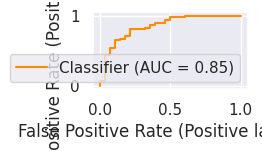

In [ ]:
for labels in X_train:
        if X_train[labels].dtype not in [np.int64,np.float64]:
            #print(labels)
            X_train[labels] = X_train[labels].astype("category")
            #print(features[labels].dtype)

for labels in X_valid:
        if X_valid[labels].dtype not in [np.int64,np.float64]:
            #print(labels)
            X_valid[labels] = X_valid[labels].astype("category")
            #print(features[labels].dtype)

boosted_tree = xgb.XGBClassifier(reg_lambda=1,enable_categorical=True)
Y_valid = le.transform(Y_valid)
Y_train = le.transform(Y_train)
boosted_tree.fit(X_train,Y_train)
score = boosted_tree.predict_proba(X_valid)
#print(score.T[1])
scores = np.array(score).T[1].tolist()
auc = roc_auc_score(Y_valid,scores)

print(list(Y_valid))
print(list(scores))
display = RocCurveDisplay.from_predictions(
    y_true = list(Y_valid),
    y_pred = list(scores),
    color="darkorange"
)

The Boosted Decision Tree did better because it creates many small decision trees that then vote on what classification the label should be whereas the single decision tree has to make split on certain values which can lead to overfitting to the data.

In [ ]:
for labels in test_data:
        if test_data[labels].dtype not in [np.int64,np.float64]:
            #print(labels)
            test_data[labels] = test_data[labels].astype("category")
            #print(features[labels].dtype)

tree.fit(features,label)
preds = tree.predict(test_data)

boosted_preds = boosted_tree.predict(test_data)
boosted_preds = le.inverse_transform(boosted_preds)

pred_file = open('./preds.csv','w+')

print(preds)
print(boosted_preds)

pred_file.write('pred_tree,pred xgboost\n')
for i in range(len(preds)):
    pred_file.write(preds[i]+','+boosted_preds[i]+'\n')
print(pred_file)

['Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y']
['Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N'
 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y']
<_io.TextIOWrapper name='/content/drive/MyDrive/CSCE_633/HW2/Brandon_Thomas_preds.csv' mode='w+' encoding='UTF-8'>
